Данный ноутбук производит кластеризацию клиентов банка

In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
dataset = pd.read_csv('./data/german_credit_data.csv')
columns = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']
dataset = dataset[columns]
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [3]:
dataset.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8
top,NaN,male,NaN,own,little,little,NaN,NaN,car
freq,NaN,690,NaN,713,603,274,NaN,NaN,337
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN


Как можно заметить, в датасете присутствуют категориальные признаки:
- `Sex` (male/female)
- `Housing` (free/own/rent)
- `Saving accounts` (moderate/little/quite rich/rich)
- `Checking account` (moderate/little/rich)
- `Purpose` (8 различных значений)

`Sex` можно закодировать любым энкодером с получением одного столбца.

`Saving accounts` и `Checking account` логично можно закодировать последовательными числами, тк аккаунты идут по возрастанию (не считая значения `moderate`)

`Housing` и `Purpose` можно закодировать любым энкодером, но для уменьшения размерности и скорости работы моделей, лучше использовать что-то вроде `LabelEncoder`, тк он дает один столбец


In [7]:
data = dataset.copy()

In [65]:
dataset = data.copy()
dataset = dataset.drop('Sex', axis=1)
dataset['Housing'] = LabelEncoder().fit_transform(dataset['Housing'])
dataset['Purpose'] = LabelEncoder().fit_transform(dataset['Purpose'])
dataset['Saving accounts'] = dataset['Saving accounts'].map(lambda x: {'moderate': 0, 'little': 1, 'quite rich': 2, 'rich': 3}.get(x, -1))
dataset['Checking account'] = dataset['Checking account'].map(lambda x: {'moderate': 0, 'little': 1, 'quite rich': 2, 'rich': 3}.get(x, -1))
# dataset = dataset.apply(LabelEncoder().fit_transform)
dataset.describe(include='all')

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,1.071000,0.690000,0.069000,3271.258000,20.903000,2.878000
std,11.375469,0.653614,0.531264,0.997444,1.109716,2822.736876,12.058814,1.978138
min,19.000000,0.000000,0.000000,-1.000000,-1.000000,250.000000,4.000000,0.000000
25%,27.000000,2.000000,1.000000,0.000000,-1.000000,1365.500000,12.000000,1.000000
50%,33.000000,2.000000,1.000000,1.000000,0.000000,2319.500000,18.000000,3.000000
75%,42.000000,2.000000,1.000000,1.000000,1.000000,3972.250000,24.000000,5.000000
max,75.000000,3.000000,2.000000,3.000000,3.000000,18424.000000,72.000000,7.000000


Далее требуется привести датасет к единой размерности, тк различная размерность порождает разные порядки расстояний у точек у алгоритмов кластеризации.

In [66]:
scaled_dataset = pd.DataFrame(MinMaxScaler().fit_transform(dataset), columns=dataset.columns)
scaled_dataset.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.857143,0.666667,0.5,0.0,0.50,0.050567,0.029412,0.714286
1,0.053571,0.666667,0.5,0.5,0.25,0.313690,0.647059,0.714286
2,0.535714,0.333333,0.5,0.5,0.00,0.101574,0.117647,0.428571
3,0.464286,0.666667,0.0,0.5,0.50,0.419941,0.558824,0.571429
4,0.607143,0.666667,0.0,0.5,0.50,0.254209,0.294118,0.142857


## Уменьшение размерности для визуализации

In [67]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


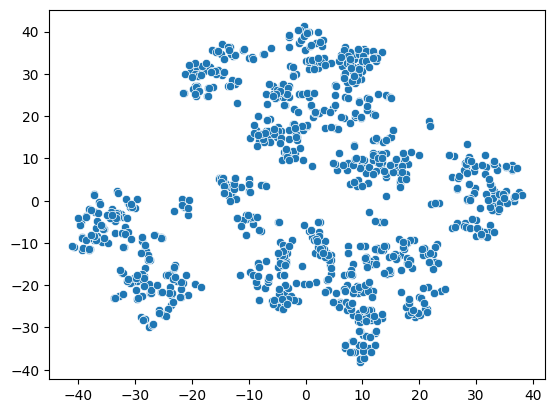

In [68]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=10)
dataset_tsne = tsne.fit_transform(scaled_dataset)
sns.scatterplot(x=dataset_tsne[:,0], y=dataset_tsne[:,1]);

## Дендрограмма

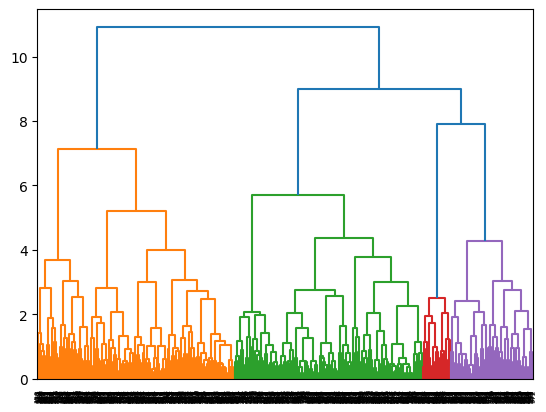

In [69]:
linkage_ = linkage(scaled_dataset, method='ward')
dendrogram_ = dendrogram(linkage_)

Из дендрограммы видно, что наиболее явно выделяются 2, 3 или 4 кластера.

## KMeans

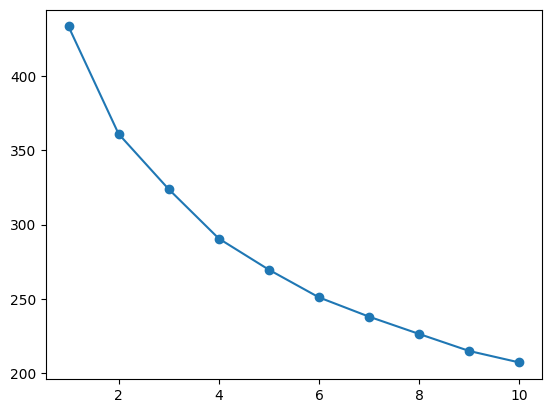

In [71]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init=10).fit(scaled_dataset)
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)
    
plt.plot(range(1,11), inertia, marker='o');

Локтевой метод так же предлагает деление на 2 или 3 кластера.

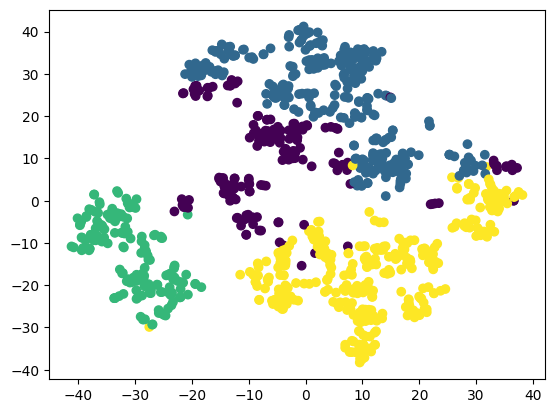

In [89]:
kmeans = KMeans(n_clusters=4, random_state=10, n_init=10).fit(scaled_dataset)
plt.scatter(dataset_tsne[:,0], dataset_tsne[:,1], c=kmeans.labels_);

Как можно заметить, в случае 3-х кластеров, больший кластер так же был разделен на 2.

In [97]:
labeled_data = data.copy()
labeled_data['label'] = kmeans.labels_
labeled_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,3


In [104]:
labeled_data[labeled_data['label']==0].describe(include='all')

{'own', 'rent', 'free'}


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,178.000000,178,178.000000,178,158,178,178.000000,178.000000,178,178.0
unique,NaN,2,NaN,3,4,2,NaN,NaN,8,NaN
top,NaN,male,NaN,own,little,little,NaN,NaN,radio/TV,NaN
freq,NaN,125,NaN,149,131,116,NaN,NaN,65,NaN
mean,36.095506,NaN,1.837079,NaN,NaN,NaN,2698.629213,19.971910,NaN,0.0
std,11.974874,NaN,0.698163,NaN,NaN,NaN,2300.568070,10.817662,NaN,0.0
min,20.000000,NaN,0.000000,NaN,NaN,NaN,338.000000,4.000000,NaN,0.0
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1276.750000,12.000000,NaN,0.0
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2038.500000,18.000000,NaN,0.0
75%,44.000000,NaN,2.000000,NaN,NaN,NaN,3415.500000,24.000000,NaN,0.0


In [103]:
labeled_data[labeled_data['label']==1].describe(include='all')

{'own', 'free'}


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,302.000000,302,302.000000,302,243,116,302.000000,302.000000,302,302.0
unique,NaN,2,NaN,2,4,1,NaN,NaN,5,NaN
top,NaN,male,NaN,own,little,moderate,NaN,NaN,radio/TV,NaN
freq,NaN,210,NaN,279,173,116,NaN,NaN,180,NaN
mean,35.642384,NaN,1.887417,NaN,NaN,NaN,2820.390728,19.731788,NaN,1.0
std,10.593889,NaN,0.559343,NaN,NaN,NaN,2556.119918,12.017053,NaN,0.0
min,20.000000,NaN,0.000000,NaN,NaN,NaN,368.000000,4.000000,NaN,1.0
25%,27.250000,NaN,2.000000,NaN,NaN,NaN,1311.500000,12.000000,NaN,1.0
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,1998.000000,18.000000,NaN,1.0
75%,41.000000,NaN,2.000000,NaN,NaN,NaN,3342.750000,24.000000,NaN,1.0


In [100]:
labeled_data[labeled_data['label']==2].describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,171.000000,171,171.000000,171,142,113,171.000000,171.000000,171,171.0
unique,NaN,2,NaN,1,4,3,NaN,NaN,7,NaN
top,NaN,female,NaN,rent,little,little,NaN,NaN,car,NaN
freq,NaN,92,NaN,171,100,65,NaN,NaN,63,NaN
mean,30.134503,NaN,1.842105,NaN,NaN,NaN,3106.269006,19.175439,NaN,2.0
std,9.991734,NaN,0.654113,NaN,NaN,NaN,2393.760674,10.602646,NaN,0.0
min,19.000000,NaN,0.000000,NaN,NaN,NaN,276.000000,4.000000,NaN,2.0
25%,23.000000,NaN,2.000000,NaN,NaN,NaN,1410.500000,12.000000,NaN,2.0
50%,26.000000,NaN,2.000000,NaN,NaN,NaN,2302.000000,18.000000,NaN,2.0
75%,35.000000,NaN,2.000000,NaN,NaN,NaN,3641.000000,24.000000,NaN,2.0


In [107]:
labeled_data[labeled_data['label']==3].describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,349.000000,349,349.000000,349,274,199,349.000000,349.000000,349,349.0
unique,NaN,2,NaN,3,4,2,NaN,NaN,4,NaN
top,NaN,male,NaN,own,little,moderate,NaN,NaN,car,NaN
freq,NaN,276,NaN,285,199,106,NaN,NaN,255,NaN
mean,37.833811,NaN,1.982808,NaN,NaN,NaN,4034.303725,23.237822,NaN,3.0
std,11.527872,NaN,0.698720,NaN,NaN,NaN,3284.715237,13.020459,NaN,0.0
min,21.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,3.0
25%,29.000000,NaN,2.000000,NaN,NaN,NaN,1437.000000,12.000000,NaN,3.0
50%,36.000000,NaN,2.000000,NaN,NaN,NaN,2910.000000,21.000000,NaN,3.0
75%,44.000000,NaN,2.000000,NaN,NaN,NaN,5804.000000,30.000000,NaN,3.0


In [117]:
print(
    set(labeled_data[labeled_data['label']==1]['Purpose']),
    set(labeled_data[labeled_data['label']==3]['Purpose']),
    sep='\n'
)

{'repairs', 'vacation/others', 'furniture/equipment', 'radio/TV', 'education'}
{'education', 'business', 'car', 'domestic appliances'}
{'education'}


Как можно заметить:

- к первому кластеру отнесены тольк люди с аккаунтом на модерации
- к второму кластеру кластеру были отнесены только люди с арендным жильем.
- первый и третий кластер сильно отличаются целью крелита (совпадает только вариант `education`)
- в четвертом кластере в среднем больше сумма и срок кредита


## AgglomerativeClustering

In [118]:
from sklearn.cluster import AgglomerativeClustering

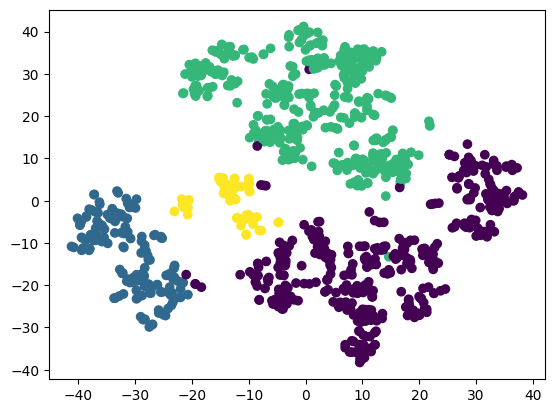

In [119]:
model = AgglomerativeClustering(n_clusters=4).fit(scaled_dataset)
plt.scatter(dataset_tsne[:,0], dataset_tsne[:,1], c=model.labels_);

Как можно заметить, англомеративный алгоритм более точно выделил "средний" кластер

In [166]:
labeled_data = dataset.copy()
labeled_data['label'] = model.labels_

In [136]:
labeled_data.groupby('label').mean().T.round(2)

label,0,1,2,3
Age,38.55,29.79,34.98,35.18
Job,1.97,1.86,1.87,1.75
Housing,0.75,2.00,0.99,1.13
Saving accounts,0.62,0.73,0.73,0.80
Checking account,-0.08,0.05,-0.19,3.00
Credit amount,3807.52,3150.69,2915.05,2217.82
Duration,22.44,19.49,20.53,16.62
Purpose,1.18,2.76,4.65,3.24


In [165]:
labeled_data = data.copy()
labeled_data['label'] = model.labels_

In [131]:
labeled_data[labeled_data['label']==0].describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,398.000000,398,398.000000,398,317,230,398.000000,398.000000,398,398.0
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,NaN
top,NaN,male,NaN,own,little,little,NaN,NaN,car,NaN
freq,NaN,314,NaN,292,229,112,NaN,NaN,262,NaN
mean,38.552764,NaN,1.974874,NaN,NaN,NaN,3807.520101,22.442211,NaN,0.0
std,11.772443,NaN,0.691344,NaN,NaN,NaN,3140.704091,12.803708,NaN,0.0
min,21.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,0.0
25%,30.000000,NaN,2.000000,NaN,NaN,NaN,1397.000000,12.000000,NaN,0.0
50%,36.000000,NaN,2.000000,NaN,NaN,NaN,2749.500000,21.000000,NaN,0.0
75%,45.000000,NaN,2.000000,NaN,NaN,NaN,5299.750000,29.500000,NaN,0.0


In [132]:
labeled_data[labeled_data['label']==1].describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,167.000000,167,167.000000,167,141,111,167.000000,167.000000,167,167.0
unique,NaN,2,NaN,1,4,2,NaN,NaN,7,NaN
top,NaN,female,NaN,rent,little,little,NaN,NaN,car,NaN
freq,NaN,91,NaN,167,100,65,NaN,NaN,61,NaN
mean,29.790419,NaN,1.862275,NaN,NaN,NaN,3150.694611,19.491018,NaN,1.0
std,9.367228,NaN,0.639241,NaN,NaN,NaN,2577.143784,11.026184,NaN,0.0
min,19.000000,NaN,0.000000,NaN,NaN,NaN,276.000000,4.000000,NaN,1.0
25%,23.000000,NaN,2.000000,NaN,NaN,NaN,1410.500000,12.000000,NaN,1.0
50%,26.000000,NaN,2.000000,NaN,NaN,NaN,2301.000000,18.000000,NaN,1.0
75%,34.500000,NaN,2.000000,NaN,NaN,NaN,3641.000000,24.000000,NaN,1.0


In [133]:
labeled_data[labeled_data['label']==2].describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,380.000000,380,380.000000,380,313,210,380.000000,380.000000,380,380.0
unique,NaN,2,NaN,2,4,2,NaN,NaN,6,NaN
top,NaN,male,NaN,own,little,moderate,NaN,NaN,radio/TV,NaN
freq,NaN,263,NaN,375,238,113,NaN,NaN,209,NaN
mean,34.978947,NaN,1.871053,NaN,NaN,NaN,2915.050000,20.531579,NaN,2.0
std,10.680517,NaN,0.591678,NaN,NaN,NaN,2627.580656,11.835573,NaN,0.0
min,20.000000,NaN,0.000000,NaN,NaN,NaN,338.000000,4.000000,NaN,2.0
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1312.500000,12.000000,NaN,2.0
50%,32.000000,NaN,2.000000,NaN,NaN,NaN,2084.500000,18.000000,NaN,2.0
75%,40.000000,NaN,2.000000,NaN,NaN,NaN,3555.250000,24.000000,NaN,2.0


In [134]:
labeled_data[labeled_data['label']==3].describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,55.000000,55,55.000000,55,46,55,55.000000,55.000000,55,55.0
unique,NaN,2,NaN,3,4,1,NaN,NaN,6,NaN
top,NaN,male,NaN,own,little,rich,NaN,NaN,radio/TV,NaN
freq,NaN,37,NaN,46,36,55,NaN,NaN,22,NaN
mean,35.181818,NaN,1.745455,NaN,NaN,NaN,2217.818182,16.618182,NaN,3.0
std,11.540734,NaN,0.775031,NaN,NaN,NaN,1350.739209,9.206461,NaN,0.0
min,20.000000,NaN,0.000000,NaN,NaN,NaN,392.000000,4.000000,NaN,3.0
25%,26.000000,NaN,1.000000,NaN,NaN,NaN,1298.000000,10.000000,NaN,3.0
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,1905.000000,12.000000,NaN,3.0
75%,41.500000,NaN,2.000000,NaN,NaN,NaN,3016.500000,24.000000,NaN,3.0


In [138]:
print(
    set(labeled_data[labeled_data['label']==1]['Purpose']),
    set(labeled_data[labeled_data['label']==3]['Purpose']),
    sep='\n'
)

{'business', 'repairs', 'domestic appliances', 'furniture/equipment', 'car', 'radio/TV', 'education'}
{'business', 'domestic appliances', 'furniture/equipment', 'car', 'radio/TV', 'education'}


В целом, в данном подходе можно замтетить логику аналогичную KMeans:
- Выделение в отдельный кластер людей с арендным жильем
- Зависимость от срока и размера кредита

В данном случае были выделены в отдельные люди с маленькими кредитами (до 6300) и большими (max 18424)

Однако уменьшилась зависимость от цели кредита

## DBScan

In [139]:
from sklearn.cluster import DBSCAN
import numpy as np

num of clusters: 5


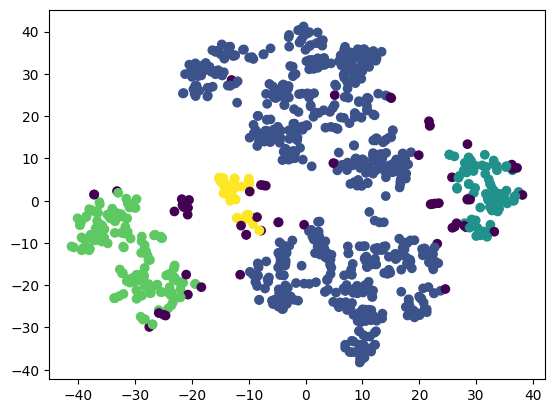

In [152]:
model = DBSCAN(eps=0.5, min_samples=10).fit(scaled_dataset)
unique_labels = np.unique(model.labels_)
print(f'num of clusters: {len(unique_labels)}')
plt.scatter(dataset_tsne[:,0], dataset_tsne[:,1], c=model.labels_);

Как видно, DBScan выделяет 4-5 кластеров

In [155]:
labeled_data = dataset.copy()
labeled_data['label'] = model.labels_
labeled_data.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
0,67,2,1,-1,1,1169,6,5,0
1,22,2,1,1,0,5951,48,5,0
2,49,1,1,1,-1,2096,12,3,0
3,45,2,0,1,1,7882,42,4,1
4,53,2,0,1,1,4870,24,1,1


In [157]:
labeled_data[labeled_data['label'] >= 0].groupby('label').mean().T.round(2)

label,0,1,2,3
Age,35.50,40.41,29.31,34.18
Job,1.88,2.20,1.83,1.87
Housing,1.00,0.00,2.00,1.00
Saving accounts,0.70,0.65,0.68,0.74
Checking account,-0.21,0.06,0.04,3.00
Credit amount,3011.08,5123.01,2895.04,2305.82
Duration,20.48,28.32,18.45,16.41
Purpose,2.95,2.24,2.78,3.59


Можно заметить 2 кластера с достаточно высокими (1) и достаточно низкими (3) средними суммами кредита.

Так же в 1 кластере высокий средний возраст, а в 2 наоборот, низкий

In [158]:
labeled_data = data.copy()
labeled_data['label'] = model.labels_
labeled_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,1


In [159]:
labeled_data[labeled_data['label']==0].describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,659.000000,659,659.000000,659,540,355,659.000000,659.000000,659,659.0
unique,NaN,2,NaN,1,4,2,NaN,NaN,8,NaN
top,NaN,male,NaN,own,little,moderate,NaN,NaN,radio/TV,NaN
freq,NaN,480,NaN,659,396,189,NaN,NaN,207,NaN
mean,35.502276,NaN,1.881639,NaN,NaN,NaN,3011.081942,20.484067,NaN,0.0
std,10.566532,NaN,0.617338,NaN,NaN,NaN,2483.477061,11.511629,NaN,0.0
min,20.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,0.0
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1320.000000,12.000000,NaN,0.0
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2241.000000,18.000000,NaN,0.0
75%,41.000000,NaN,2.000000,NaN,NaN,NaN,3808.000000,24.000000,NaN,0.0


In [160]:
labeled_data[labeled_data['label']==1].describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,80.000000,80,80.000000,80,66,53,80.000000,80.000000,80,80.0
unique,NaN,2,NaN,1,4,2,NaN,NaN,6,NaN
top,NaN,male,NaN,free,little,little,NaN,NaN,car,NaN
freq,NaN,68,NaN,80,55,32,NaN,NaN,40,NaN
mean,40.412500,NaN,2.200000,NaN,NaN,NaN,5123.012500,28.325000,NaN,1.0
std,10.221216,NaN,0.582444,NaN,NaN,NaN,3560.936964,14.318948,NaN,0.0
min,22.000000,NaN,1.000000,NaN,NaN,NaN,700.000000,6.000000,NaN,1.0
25%,34.000000,NaN,2.000000,NaN,NaN,NaN,2020.000000,18.000000,NaN,1.0
50%,38.000000,NaN,2.000000,NaN,NaN,NaN,3952.000000,24.000000,NaN,1.0
75%,47.000000,NaN,3.000000,NaN,NaN,NaN,7208.250000,36.000000,NaN,1.0


In [161]:
labeled_data[labeled_data['label']==2].describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,160.000000,160,160.00000,160,133,105,160.000000,160.000000,160,160.0
unique,NaN,2,NaN,1,4,2,NaN,NaN,7,NaN
top,NaN,female,NaN,rent,little,little,NaN,NaN,car,NaN
freq,NaN,86,NaN,160,94,62,NaN,NaN,58,NaN
mean,29.312500,NaN,1.83125,NaN,NaN,NaN,2895.043750,18.450000,NaN,2.0
std,8.633114,NaN,0.62668,NaN,NaN,NaN,2147.224106,10.029391,NaN,0.0
min,19.000000,NaN,0.00000,NaN,NaN,NaN,276.000000,4.000000,NaN,2.0
25%,23.000000,NaN,2.00000,NaN,NaN,NaN,1398.500000,12.000000,NaN,2.0
50%,26.000000,NaN,2.00000,NaN,NaN,NaN,2215.500000,15.500000,NaN,2.0
75%,33.250000,NaN,2.00000,NaN,NaN,NaN,3570.250000,24.000000,NaN,2.0


In [162]:
labeled_data[labeled_data['label']==3].describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,label
count,39.000000,39,39.000000,39,34,39,39.000000,39.000000,39,39.0
unique,NaN,2,NaN,1,3,1,NaN,NaN,6,NaN
top,NaN,male,NaN,own,little,rich,NaN,NaN,radio/TV,NaN
freq,NaN,24,NaN,39,28,39,NaN,NaN,18,NaN
mean,34.179487,NaN,1.871795,NaN,NaN,NaN,2305.820513,16.410256,NaN,3.0
std,9.770718,NaN,0.695076,NaN,NaN,NaN,1296.591196,9.019622,NaN,0.0
min,23.000000,NaN,0.000000,NaN,NaN,NaN,609.000000,6.000000,NaN,3.0
25%,26.000000,NaN,1.500000,NaN,NaN,NaN,1326.500000,10.000000,NaN,3.0
50%,31.000000,NaN,2.000000,NaN,NaN,NaN,2100.000000,12.000000,NaN,3.0
75%,39.000000,NaN,2.000000,NaN,NaN,NaN,3033.000000,22.500000,NaN,3.0


Исходя из детального просмотра, видно, что в люди с арендным жильем опять были выделены в отдельный кластер.
Однако в данном случае так же в отдельный кластер были выделены люди без собственного жилья.

Люди с собственным жильем разбилисть на 2 кластера. При этом в 3 кластер были выделены только с `Checking account`=`rich`


PS: BoxPlot-ы по заданию не строил, на мой взгляд таблицы нагляднее